# dTm__ternary_classification

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('../src/dTm_ter_train.csv')
df_test = pd.read_csv('../src/dTm_ter_test.csv')
df_train.head(5)

,SecStr,ASA_pct,dMW,dChg,dARM,dHydro,dVdwV,dSASA,totalE,dTmC
0,2,50.42,-60,0.0,0.0,-0.122,-57,-93,1.573,unstable
1,4,47.50,-40,0.0,0.0,-0.210,-42,-95,0.073,stable
2,3,39.68,-60,0.0,0.0,-0.122,-57,-93,0.286,neutral
3,1,42.19,99,1.0,0.0,-0.501,100,186,-0.204,unstable
4,2,58.54,-2,0.0,0.0,0.375,12,15,-0.167,neutral


In [3]:
def return_array(df:pd.DataFrame):
    X = df.iloc[:,0:len(df.columns)-1]
    df = df.replace({'ddGC': {'unstable' : 0, 
                                'neutral' : 1, 
                                'stable' : 2}})
    y = df['dTmC']
    return X,y

In [4]:
X_train, y_train = return_array(df_train)
X_test, y_test = return_array(df_test)

# Correlation

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

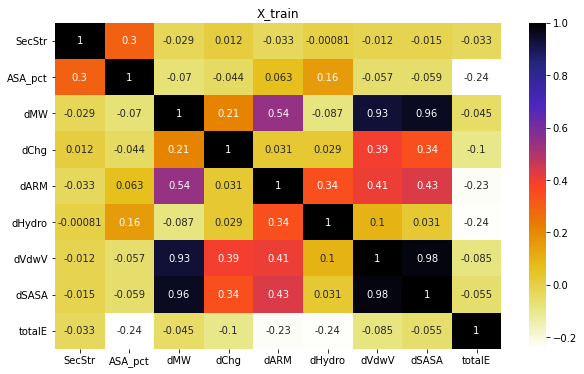

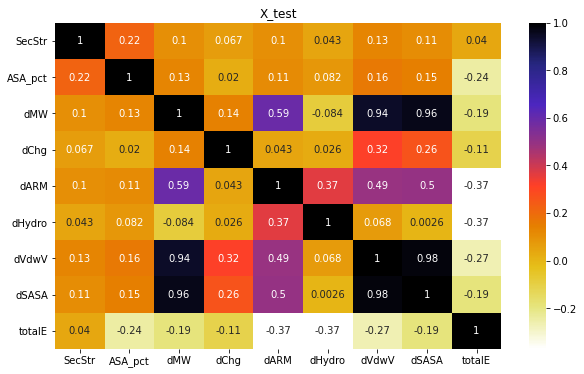

In [6]:
plt.figure(figsize=(10,6))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("X_train")
plt.show()

# delta_VdwV and delta_MW are correlated
# delta_SASA and delta_MW are correlated
# delta_SASA and delta_VdwV are correlated


plt.figure(figsize=(10,6))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("X_test")
plt.show()


# delta_VdwV and delta_MW are correlated
# delta_SASA and delta_MW are correlated
# delta_SASA and delta_VdwV are correlated

# Support Vector Machine

In [7]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
import numpy as np
model = []
cv_accuracy = []
test_accuracy = []

# best params : {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

clf = SVC(C=100,gamma='scale',kernel='rbf')

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.6119295634920634


In [8]:
from sklearn.metrics import classification_report, accuracy_score
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("SVC")

              precision    recall  f1-score   support

     neutral       0.70      0.39      0.50        49
      stable       0.44      0.15      0.22        27
    unstable       0.66      0.98      0.79        84

    accuracy                           0.66       160
   macro avg       0.60      0.50      0.50       160
weighted avg       0.64      0.66      0.60       160

0.65625


# Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.6026289682539683


In [10]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("RF")

              precision    recall  f1-score   support

     neutral       0.69      0.45      0.54        49
      stable       0.73      0.30      0.42        27
    unstable       0.68      0.94      0.79        84

    accuracy                           0.68       160
   macro avg       0.70      0.56      0.58       160
weighted avg       0.69      0.68      0.65       160

0.68125


# Naive-Bayes Classifier

In [11]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.6072668650793651


In [12]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("NB")

              precision    recall  f1-score   support

     neutral       0.43      0.53      0.48        49
      stable       0.38      0.19      0.25        27
    unstable       0.74      0.76      0.75        84

    accuracy                           0.59       160
   macro avg       0.52      0.49      0.49       160
weighted avg       0.58      0.59      0.58       160

0.59375


# KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.5164186507936508


In [14]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("KNN")

              precision    recall  f1-score   support

     neutral       0.49      0.49      0.49        49
      stable       0.33      0.15      0.21        27
    unstable       0.64      0.75      0.69        84

    accuracy                           0.57       160
   macro avg       0.49      0.46      0.46       160
weighted avg       0.54      0.57      0.55       160

0.56875


#  Artificial Neural Network

In [15]:
from sklearn.neural_network import MLPClassifier

# best params: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}

clf = MLPClassifier(activation='relu',alpha=0.05,hidden_layer_sizes=(100,),learning_rate='adaptive',solver='adam',max_iter=3000)
clf.fit(X_train, y_train.values.ravel())

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.5963045634920634


In [16]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("ANN")

              precision    recall  f1-score   support

     neutral       0.61      0.45      0.52        49
      stable       0.60      0.44      0.51        27
    unstable       0.69      0.86      0.77        84

    accuracy                           0.66       160
   macro avg       0.63      0.58      0.60       160
weighted avg       0.65      0.66      0.65       160

0.6625


# Overall

['SVC', 'RF', 'NB', 'KNN', 'ANN']
[0.6119295634920634, 0.6026289682539683, 0.6072668650793651, 0.5164186507936508, 0.5963045634920634]


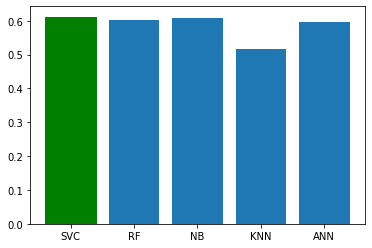

In [18]:
bar_list = plt.bar(model,cv_accuracy)
bar_list[0].set_color('green')
print(model)
print(cv_accuracy)